In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Basic EDA of the final ten feature set

In [2]:
df = pd.read_csv("/data/workspace_files/ten_feature_set.csv")

In [3]:
df.head()

,Weighted Volume Price,200 hour moving average,50 hour moving average,bollinger_up_7hr,bollinger_down_7hr,RSI,200 hour volatility,7 hour return,6 hour return,5 hour return,Date
0,605.64,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2014-07-23 19:00:00
1,605.64,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2014-07-23 20:00:00
2,605.64,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2014-07-23 21:00:00
3,605.64,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2014-07-23 22:00:00
4,605.64,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2014-07-23 23:00:00


In [4]:
df.columns

Index(['Weighted Volume Price', '200 hour moving average',
       '50 hour moving average', 'bollinger_up_7hr', 'bollinger_down_7hr',
       'RSI', '200 hour volatility', '7 hour return', '6 hour return',
       '5 hour return', 'Date'],
      dtype='object')

In [5]:
## plotting time series of different prices and features
def plot_univariate_timeseries(series, title = "", ylabel="", kind=None):
    if not kind:
        series.plot()
    else:
        series.plot(kind=kind)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.ylabel(ylabel)

def plot_twin_plots(series1, series2, label1, label2, title=""):
    ax1 = series1.plot(label=label1)
    ax2 = ax1.twinx()
    series2.plot(ax=ax2, label=label2)
    plt.xticks(rotation=45)
    plt.title(title)

In [6]:
## Set index as date
df = df.set_index("Date")

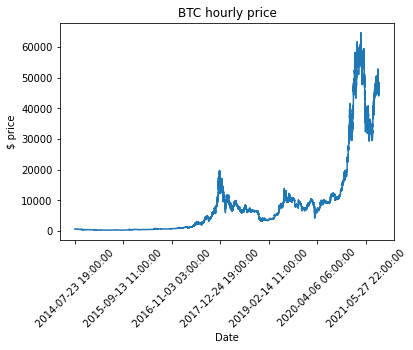

In [7]:
plot_univariate_timeseries(df["Weighted Volume Price"], title="BTC hourly price", ylabel="$ price")

#### Plot all the different time series

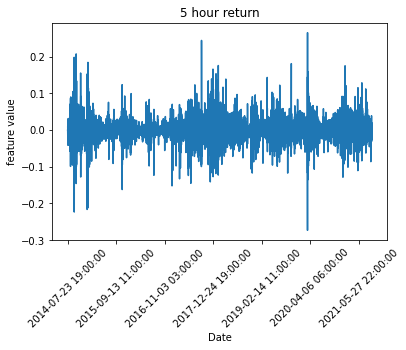

In [8]:
for ts in df.columns[1:]:
    plot_univariate_timeseries(df[ts], title=ts, ylabel="feature value")
    plt.figure()

In [9]:
## Draw bollinger bands with moving averages
def plot_multiple_object(obj_dict, title=""):
    for key, value in obj_dict.items():
        value.plot(label=key)
    plt.xticks(rotation=45)
    plt.legend()
    plt.title(title)

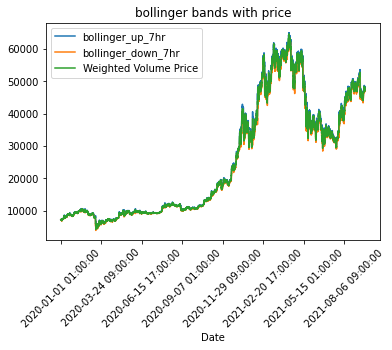

In [10]:
plot_multiple_object({"bollinger_up_7hr" : df[(df.index > '2020-01-01 00:00:00')]["bollinger_up_7hr"],
                      "bollinger_down_7hr": df[(df.index > '2020-01-01 00:00:00')]["bollinger_down_7hr"],
                      'Weighted Volume Price':df[(df.index > '2020-01-01 00:00:00')]['Weighted Volume Price']}, title="bollinger bands with price")

The curves are very jagged to make any sense

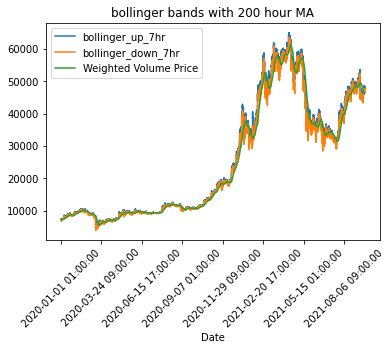

In [11]:
plot_multiple_object({"bollinger_up_7hr" : df[(df.index > '2020-01-01 00:00:00')]["bollinger_up_7hr"],
                      "bollinger_down_7hr": df[(df.index > '2020-01-01 00:00:00')]["bollinger_down_7hr"],
                      'Weighted Volume Price':df[(df.index > '2020-01-01 00:00:00')]['200 hour moving average']}, title="bollinger bands with 200 hour MA")

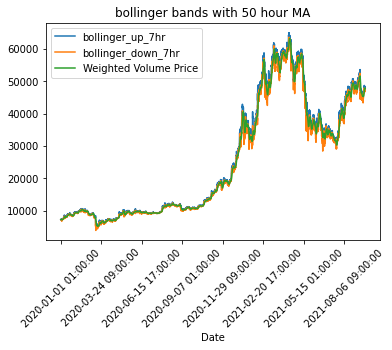

In [12]:
plot_multiple_object({"bollinger_up_7hr" : df[(df.index > '2020-01-01 00:00:00')]["bollinger_up_7hr"],
                      "bollinger_down_7hr": df[(df.index > '2020-01-01 00:00:00')]["bollinger_down_7hr"],
                      'Weighted Volume Price':df[(df.index > '2020-01-01 00:00:00')]['50 hour moving average']}, title="bollinger bands with 50 hour MA")

In [13]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

std_data = std_scaler.fit_transform(df.values)

In [14]:
std_data = pd.DataFrame(std_data, columns = df.columns, index=df.index)

#### Create normalized plots

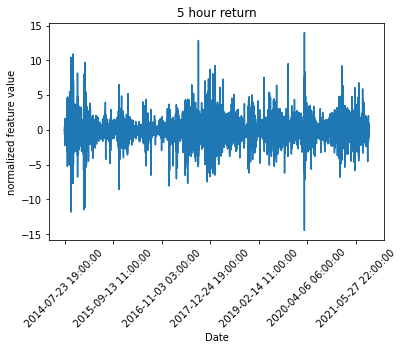

In [15]:
for ts in std_data.columns:
    plot_univariate_timeseries(std_data[ts], title=ts, ylabel="normalized feature value")
    plt.figure()

## Plotting feature distributions makes sense as well

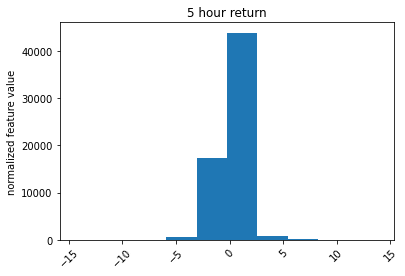

In [16]:
for ts in std_data.columns:
    plot_univariate_timeseries(std_data[ts], title=ts, ylabel="normalized feature value", kind="hist")
    plt.figure()

In [17]:
std_data.columns

Index(['Weighted Volume Price', '200 hour moving average',
       '50 hour moving average', 'bollinger_up_7hr', 'bollinger_down_7hr',
       'RSI', '200 hour volatility', '7 hour return', '6 hour return',
       '5 hour return'],
      dtype='object')

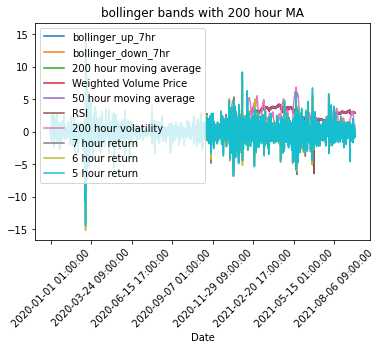

In [18]:
plotting_object = {}
plotting_object["bollinger_up_7hr"] = std_data[(std_data.index > '2020-01-01 00:00:00')]["bollinger_up_7hr"]
plotting_object["bollinger_down_7hr"] = std_data[(std_data.index > '2020-01-01 00:00:00')]["bollinger_down_7hr"]
plotting_object["200 hour moving average"] = std_data[(std_data.index > '2020-01-01 00:00:00')]["200 hour moving average"]
plotting_object["Weighted Volume Price"] = std_data[(std_data.index > '2020-01-01 00:00:00')]["Weighted Volume Price"]
plotting_object["50 hour moving average"] = std_data[(std_data.index > '2020-01-01 00:00:00')]["50 hour moving average"]
plotting_object["RSI"] = std_data[(std_data.index > '2020-01-01 00:00:00')]["RSI"]
plotting_object["200 hour volatility"] = std_data[(std_data.index > '2020-01-01 00:00:00')]["200 hour volatility"]
plotting_object["7 hour return"] = std_data[(std_data.index > '2020-01-01 00:00:00')]["7 hour return"]
plotting_object["6 hour return"] = std_data[(std_data.index > '2020-01-01 00:00:00')]["6 hour return"]
plotting_object["5 hour return"] = std_data[(std_data.index > '2020-01-01 00:00:00')]["5 hour return"]


plot_multiple_object(plotting_object, title="bollinger bands with 200 hour MA")

The returns clutter the chart

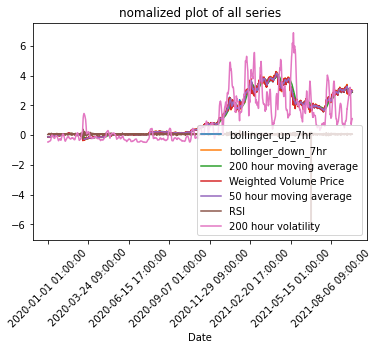

In [21]:
plotting_object = {}
plotting_object["bollinger_up_7hr"] = std_data[(std_data.index > '2020-01-01 00:00:00')]["bollinger_up_7hr"]
plotting_object["bollinger_down_7hr"] = std_data[(std_data.index > '2020-01-01 00:00:00')]["bollinger_down_7hr"]
plotting_object["200 hour moving average"] = std_data[(std_data.index > '2020-01-01 00:00:00')]["200 hour moving average"]
plotting_object["Weighted Volume Price"] = std_data[(std_data.index > '2020-01-01 00:00:00')]["Weighted Volume Price"]
plotting_object["50 hour moving average"] = std_data[(std_data.index > '2020-01-01 00:00:00')]["50 hour moving average"]
plotting_object["RSI"] = std_data[(std_data.index > '2020-01-01 00:00:00')]["RSI"]
plotting_object["200 hour volatility"] = std_data[(std_data.index > '2020-01-01 00:00:00')]["200 hour volatility"]
# plotting_object["7 hour return"] = std_data[(std_data.index > '2020-01-01 00:00:00')]["7 hour return"]
# plotting_object["6 hour return"] = std_data[(std_data.index > '2020-01-01 00:00:00')]["6 hour return"]
# plotting_object["5 hour return"] = std_data[(std_data.index > '2020-01-01 00:00:00')]["5 hour return"]


plot_multiple_object(plotting_object, title="nomalized plot of all series")

## Correlation matrix

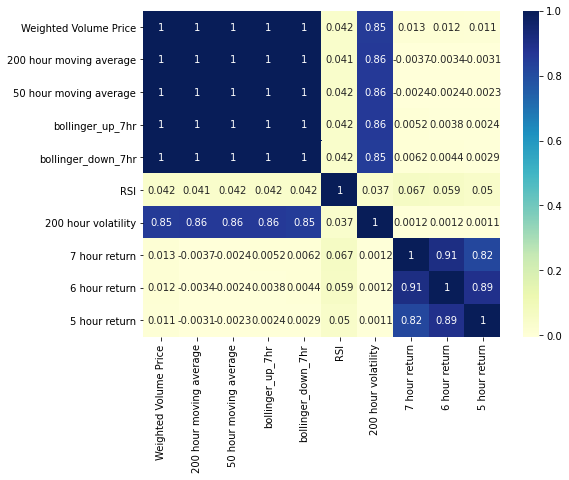

In [20]:
import seaborn as sb

### Create a correlation matrix

fig, ax = plt.subplots(figsize=(8,6))
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True, ax=ax)
  
# displaying heatmap
plt.show()